<a href="https://colab.research.google.com/github/aureliodeboa/Restic36-Ciencia-de-Dados/blob/main/Atividade_RESTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [64]:
import kagglehub
import pandas as pd
import zipfile
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Obtenção do dataset


In [10]:
# Download latest version
path = kagglehub.dataset_download("surajjha101/top-instagram-influencers-data-cleaned")

In [11]:
# Leitura dos dados e transformação em df

path = '/root/.cache/kagglehub/datasets/surajjha101/top-instagram-influencers-data-cleaned/versions/3'
csv_path = "/root/.cache/kagglehub/datasets/surajjha101/top-instagram-influencers-data-cleaned/versions/3/top_insta_influencers_data.csv"
df = pd.read_csv(csv_path)

In [12]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


#  Metadados

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               138 non-null    int64  
 1   channel_info       138 non-null    object 
 2   influence_score    138 non-null    int64  
 3   posts              138 non-null    float64
 4   followers          138 non-null    float64
 5   avg_likes          138 non-null    float64
 6   60_day_eng_rate    138 non-null    float64
 7   new_post_avg_like  138 non-null    float64
 8   total_likes        138 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 11.9+ KB


In [24]:
df.shape

(138, 10)

In [25]:
#ver se tenho valores duplicados
df.duplicated().sum()

0

In [26]:
#saber se tenho colunas com null
df.isnull().sum()

,0
rank,0
channel_info,0
influence_score,0
posts,0
followers,0
avg_likes,0
60_day_eng_rate,0
new_post_avg_like,0
total_likes,0
country,0


# Limpeza dos dados

In [27]:
#dropar os valores nulos da tabela, como pode ser visto existiam 62 valores nulos
df = df.dropna(subset=['country'])


❌❌**Observação, não sei se faz sentido apagar pq no caso não usamos o contry para prever nada e cabamos de perder 62 dados.** ❌❌❌

In [28]:
#verificar se apagou
df.shape

(138, 10)

In [29]:
country = df['country'].value_counts()

In [30]:
#country

In [31]:
#aqui faço a troca de M de milhoes para as respctivas casas decimais e a mesma coisa para as outras letras, M, b K...

replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
convert_column = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']
df[convert_column] = df[convert_column].replace(replace, regex=True).astype(float)
df[convert_column]

,total_likes,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like
0,2.900000e+10,3300.0,475800000.0,8700000.0,1.39,6500000.0
1,5.740000e+10,6900.0,366200000.0,8300000.0,1.62,5900000.0
3,1.150000e+10,1800.0,342700000.0,6200000.0,0.97,3300000.0
4,1.250000e+10,6800.0,334100000.0,1900000.0,0.20,665300.0
5,1.990000e+10,5600.0,329200000.0,3500000.0,0.88,2900000.0
...,...,...,...,...,...,...
195,1.400000e+09,2300.0,33200000.0,623800.0,1.40,464700.0
196,1.500000e+09,3800.0,33200000.0,390400.0,0.64,208000.0
197,1.492000e+08,770.0,33200000.0,193300.0,0.26,82600.0
198,1.700000e+09,2300.0,33000000.0,719600.0,1.42,467700.0


# Visualização e análises

In [32]:
df.describe()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02
mean,96.391304,81.652174,4032.318841,8.372609e+07,1.492658e+06,1.331522,9.673341e+05,4.275290e+09
std,59.613528,8.720855,3586.774630,8.103318e+07,1.537165e+06,1.796447,1.320879e+06,6.450630e+09
min,1.000000,41.000000,20.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07
25%,47.250000,79.250000,1400.000000,4.100000e+07,4.231750e+05,0.335000,1.810250e+05,1.400000e+09
50%,93.000000,83.000000,2900.000000,5.270000e+07,1.100000e+06,0.680000,4.245500e+05,2.300000e+09
75%,145.250000,86.000000,6125.000000,7.032500e+07,1.900000e+06,1.510000,1.200000e+06,4.550000e+09
max,200.000000,93.000000,17500.000000,4.758000e+08,8.700000e+06,10.250000,6.500000e+06,5.740000e+10


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Spain'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Uruguay'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Colombia'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'United Arab Emirates'),
  Text(15, 0, 'Puerto Rico'),
  Text(16, 0, "CÃ´te d'Ivoire"),
  Text(17, 0, 'Anguilla'),
  Text(18, 0, 'Switzerland'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'British Virgin Islands'),
  Text(21, 0, 'Czech Republic'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Germany'),
  Text(24, 0, 'Russia')])

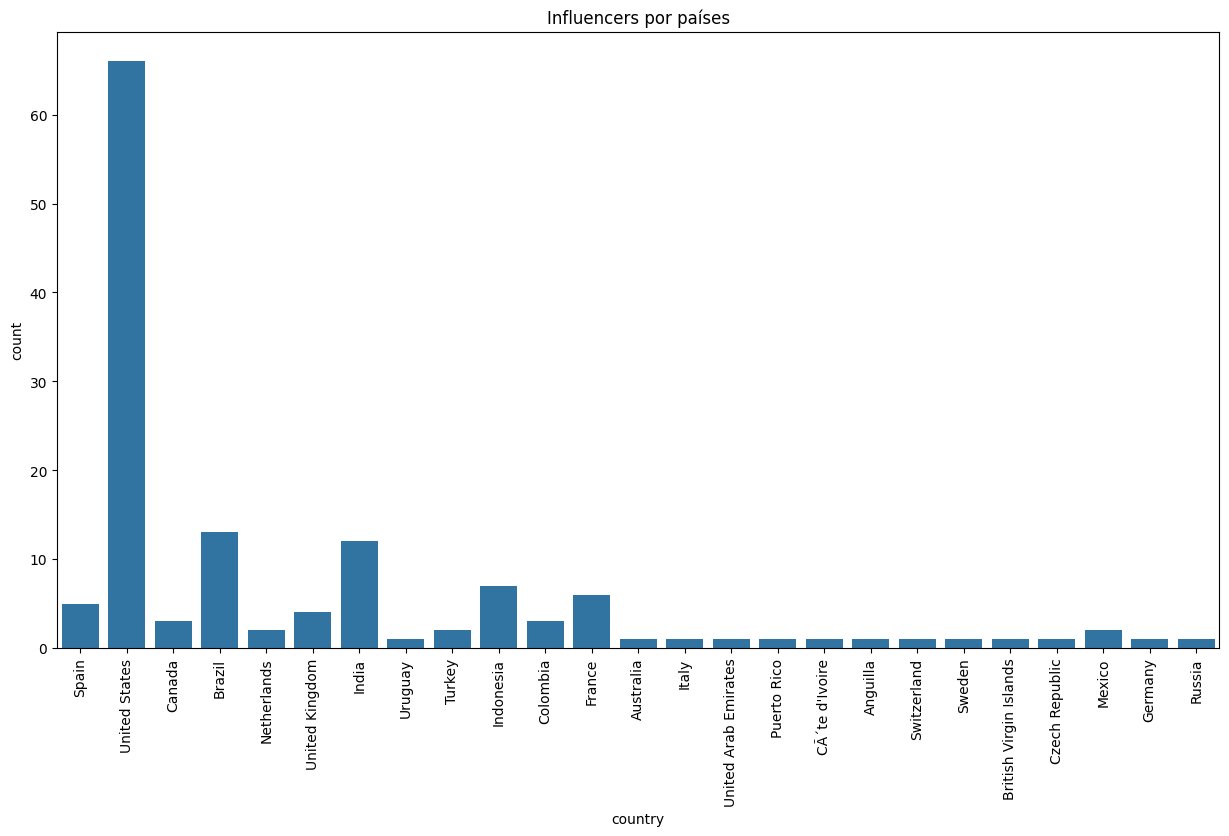

In [35]:
plt.figure(figsize=(15,8))
plt.title('Influencers por países')
sns.countplot(x=df["country"])
plt.xticks(rotation=90)

In [36]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States


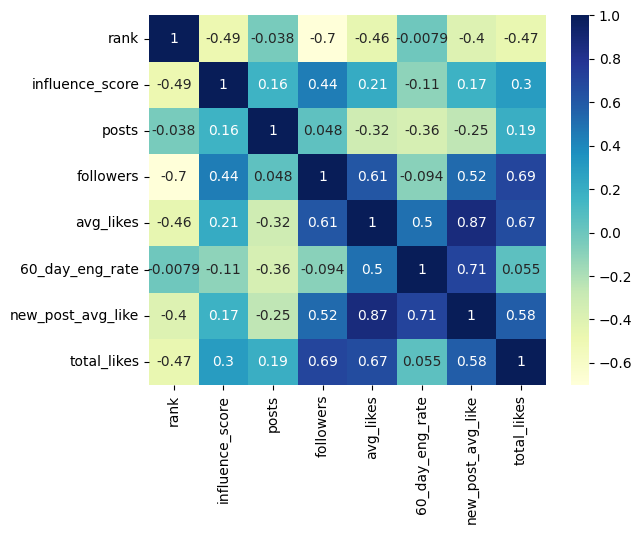

In [37]:
# Seleciono apenas colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Ver a matriz de correlação
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

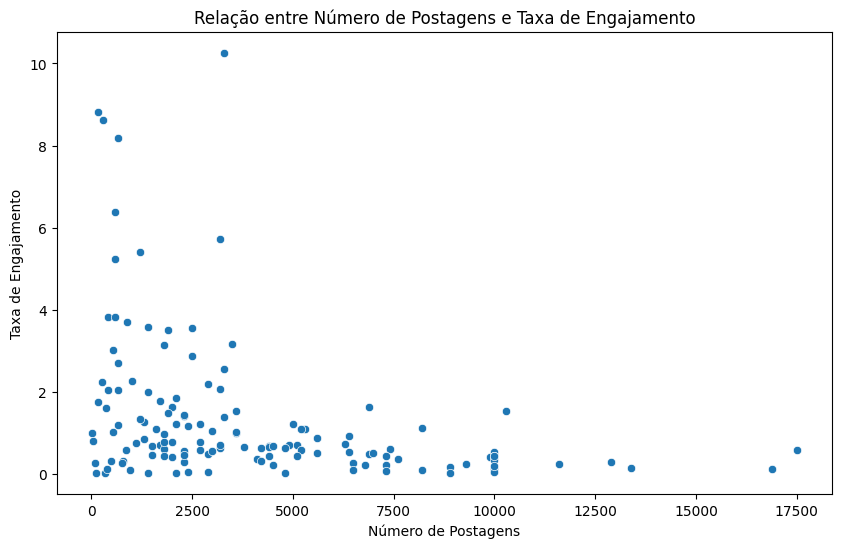

In [41]:
# Relação entre número de postagens e taxa de engajamento
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='posts', y='60_day_eng_rate')
plt.title('Relação entre Número de Postagens e Taxa de Engajamento')
plt.xlabel('Número de Postagens')
plt.ylabel('Taxa de Engajamento')
plt.show()


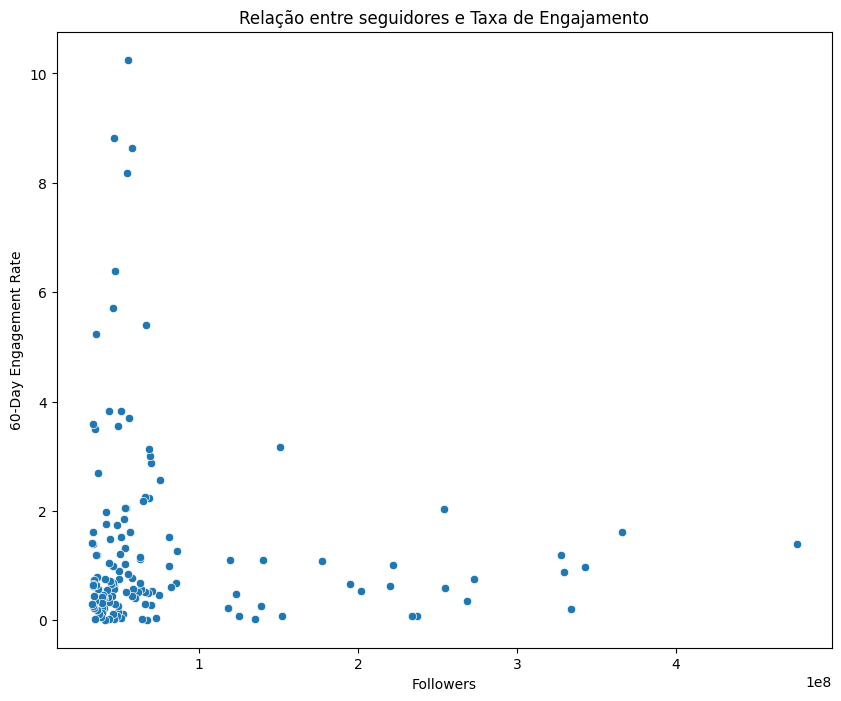

In [40]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='followers', y='60_day_eng_rate', data=df)
plt.title('Relação entre seguidores e Taxa de Engajamento')
plt.xlabel('Followers')
plt.ylabel('60-Day Engagement Rate')
plt.show()

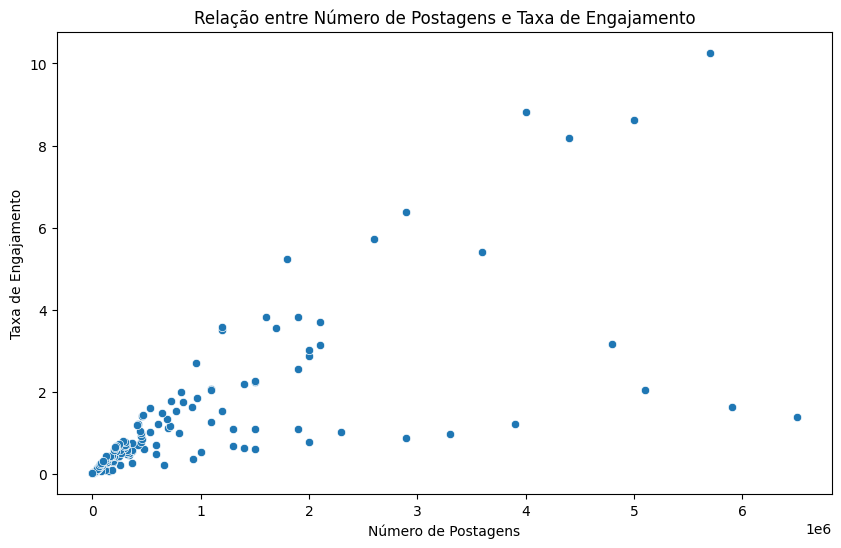

In [ ]:
# Relação entre número de likes em uma novo post e taxa de engajamento
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='new_post_avg_like', y='60_day_eng_rate')
plt.title('Relação entre Número de Postagens e Taxa de Engajamento')
plt.xlabel('Número de Postagens')
plt.ylabel('Taxa de Engajamento')
plt.show()


In [ ]:
# com esse caminho que percorremos com os dados podemos perceber as variaveis com maior correlação entre os dados


# Normalização dos dados

In [55]:

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[['posts', 'followers', 'avg_likes','new_post_avg_like','60_day_eng_rate']])
normalized_df = pd.DataFrame(x_scaled, columns=['posts', 'followers', 'avg_likes','new_post_avg_like','60_day_eng_rate'])

In [43]:
normalized_df.head()

,posts,followers,avg_likes,new_post_avg_like,60_day_eng_rate
0,0.187643,1.000000,1.000000,1.000000,0.134766
1,0.393593,0.752596,0.953676,0.907692,0.157227
2,0.101831,0.699549,0.710477,0.507692,0.093750
3,0.387872,0.680135,0.212498,0.102354,0.018555
4,0.319222,0.669074,0.397793,0.446154,0.084961


# Treino/teste do modelo e métricas de avaliação

In [57]:
# Seleção dos atributos e da classe
X = normalized_df[['followers', 'avg_likes','new_post_avg_like']]  # Variáveis independentes
y = normalized_df['60_day_eng_rate']  # Variável dependente

# Divisão dos dados em 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [58]:
# Aplicando RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)  # Seleciona as 3 variáveis mais relevantes
rfe.fit(X_train, y_train)

# Variáveis escolhidas
print(f'Suporte das variáveis: {rfe.support_}')
print(f'Ranking das variáveis: {rfe.ranking_}')

Suporte das variáveis: [ True  True  True]
Ranking das variáveis: [1 1 1]


In [73]:
# Definindo a gama de valores de alpha
alphas = [0.1, 0.5, 1, 5, 10, 50, 100]

# Modelo Ridge
ridge = Ridge()
ridge_params = {'alpha': alphas}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=10, scoring='neg_mean_squared_error')

# Ajustando o modelo Ridge
ridge_cv.fit(X_train, y_train)
print(f"Melhor alpha para Ridge: {ridge_cv.best_params_['alpha']}")
print(f"Melhor MSE para Ridge: {-ridge_cv.best_score_}")

# Modelo Lasso
lasso = Lasso()
lasso_params = {'alpha': alphas}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=10, scoring='neg_mean_squared_error')

# Ajustando o modelo Lasso
lasso_cv.fit(X_train, y_train)
print(f"Melhor alpha para Lasso: {lasso_cv.best_params_['alpha']}")
print(f"Melhor MSE para Lasso: {-lasso_cv.best_score_}")

Melhor alpha para Ridge: 0.1
Melhor MSE para Ridge: 0.008115790292644087
Melhor alpha para Lasso: 0.1
Melhor MSE para Lasso: 0.03062177474566132


In [74]:
# Criando e treinando o modelo de regressão linear (sem regularização)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculando as métricas de avaliação para o modelo de regressão linear
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo os resultados
print("Resultados para o modelo de regressão linear (sem regularização):")
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print("\n")

# Criando e treinando o modelo Ridge (Regularização L2)
ridge_model = Ridge(alpha=0.1)  # alpha é o parâmetro de regularização
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculando as métricas de avaliação para o modelo Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Imprimindo os resultados do modelo Ridge
print("Resultados para o modelo Ridge (regularização L2):")
print(f'MSE (Ridge): {mse_ridge}')
print(f'MAE (Ridge): {mae_ridge}')
print(f'R² (Ridge): {r2_ridge}')
print("\n")

# Criando e treinando o modelo Lasso (Regularização L1)
lasso_model = Lasso(alpha=0.1)  # alpha é o parâmetro de regularização
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Calculando as métricas de avaliação para o modelo Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Imprimindo os resultados do modelo Lasso
print("Resultados para o modelo Lasso (regularização L1):")
print(f'MSE (Lasso): {mse_lasso}')
print(f'MAE (Lasso): {mae_lasso}')
print(f'R² (Lasso): {r2_lasso}')

Resultados para o modelo de regressão linear (sem regularização):
MSE: 0.005939665182447538
MAE: 0.04423554964302851
R²: 0.8153365216401955


Resultados para o modelo Ridge (regularização L2):
MSE (Ridge): 0.006084292774353259
MAE (Ridge): 0.04527657553923768
R² (Ridge): 0.810840067148613


Resultados para o modelo Lasso (regularização L1):
MSE (Lasso): 0.0329780204237
MAE (Lasso): 0.10757089590097402
R² (Lasso): -0.025282700926872348


In [68]:
# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)
# Validação cruzada para calcular o erro nos dados de treinamento
train_errors = []
val_errors = []

# Treinamento e avaliação
for m in range(1, len(X_train) + 1):
    model.fit(X_train[:m], y_train[:m])
    train_error = mean_squared_error(y_train[:m], model.predict(X_train[:m]))
    val_error = mean_squared_error(y_test, model.predict(X_test))

    train_errors.append(train_error)
    val_errors.append(val_error)

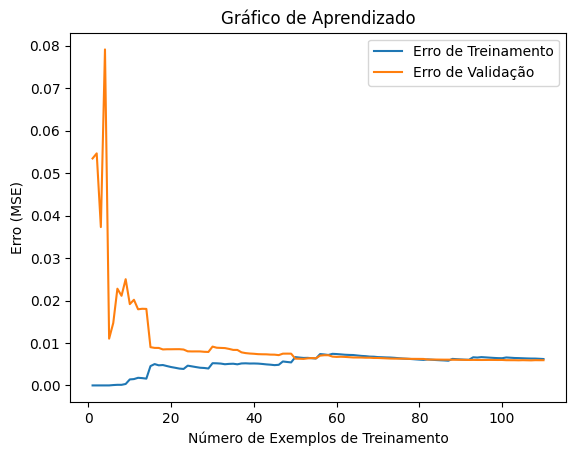

In [69]:
# Plotando os erros de treinamento e validação
plt.plot(np.arange(1, len(X_train) + 1), train_errors, label="Erro de Treinamento")
plt.plot(np.arange(1, len(X_train) + 1), val_errors, label="Erro de Validação")
plt.xlabel("Número de Exemplos de Treinamento")
plt.ylabel("Erro (MSE)")
plt.title("Gráfico de Aprendizado")
plt.legend()
plt.show()

MAE (Mean Absolute Error): 0.04423554964302851
MSE (Mean Squared Error): 0.005939665182447538
RMSE (Root Mean Squared Error): 0.07706922331545543
R² (Coeficiente de Determinação): 0.8153365216401955


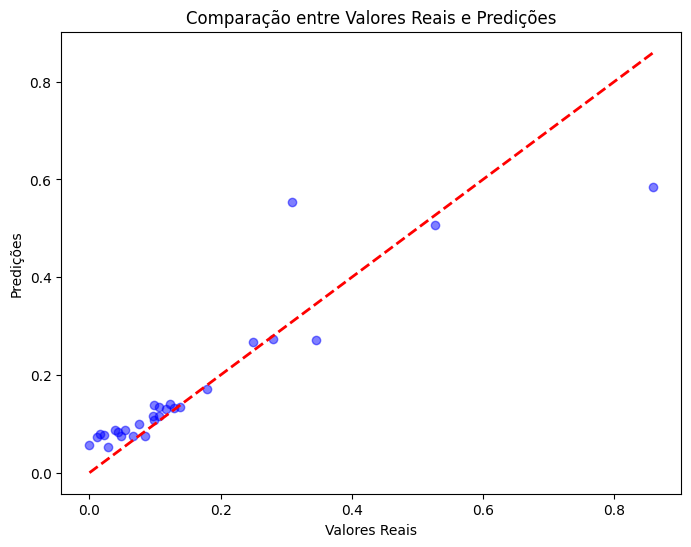

In [78]:
# Calculando as métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculando o RMSE a partir do MSE
r2 = r2_score(y_test, y_pred)

# Imprimindo os resultados
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'R² (Coeficiente de Determinação): {r2}')

# Criando o gráfico de dispersão
plt.figure(figsize=(8,6))

# Plotando os dados reais (y_test) contra as predições (y_pred)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Adicionando uma linha de identidade (linha 45 graus) para mostrar o quanto a predição se aproxima do valor real
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

# Adicionando rótulos e título
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Comparação entre Valores Reais e Predições')

# Exibindo o gráfico
plt.show()
